# 02. Neural Network Classification with TensorFlow

Okay, we've seen how to deal with a regression problem in TensorFlow, let's look at how we can approach a classification problem.

A [classification problem](https://en.wikipedia.org/wiki/Statistical_classification) involves predicting whether something is one thing or another.

For example, you might want to:
* Predict whether or not someone has heart disease based on their health parameters. This is called **binary classification** since there are only two options.
* Decide whether a photo of is of food, a person or a dog. This is called **multi-class classification** since there are more than two options.
* Predict what categories should be assigned to a Wikipedia article. This is called **multi-label classification** since a single article could have more than one category assigned.

In this notebook, we're going to work through a number of different classification problems with TensorFlow. In other words, taking a set of inputs and predicting what class those set of inputs belong to.

## What we're going to cover

Specifically, we're going to go through doing the following with TensorFlow:
- Architecture of a classification model
- Input shapes and output shapes
  - `X`: features/data (inputs)
  - `y`: labels (outputs)
    - "What class do the inputs belong to?"
- Creating custom data to view and fit
- Steps in modelling for binary and mutliclass classification
  - Creating a model
  - Compiling a model
    - Defining a loss function
    - Setting up an optimizer
      - Finding the best learning rate
    - Creating evaluation metrics
  - Fitting a model (getting it to find patterns in our data)
  - Improving a model
- The power of non-linearity
- Evaluating classification models
  - Visualizng the model ("visualize, visualize, visualize")
  - Looking at training curves
  - Compare predictions to ground truth (using our evaluation metrics)

## Typical architecture of a classification neural network

The word *typical* is on purpose.

Because the architecture of a classification neural network can widely vary depending on the problem you're working on.

However, there are some fundamentals all deep neural networks contain:
* An input layer.
* Some hidden layers.
* An output layer.

Much of the rest is up to the data analyst creating the model.

The following are some standard values you'll often use in your classification neural networks.

| **Hyperparameter** | **Binary Classification** | **Multiclass classification** |
| --- | --- | --- |
| Input layer shape | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| Neurons per hidden layer | Problem specific, generally 10 to 100 | Same as binary classification |
| Output layer shape | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) | Same as binary classification |
| Output activation | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) | [Softmax](https://en.wikipedia.org/wiki/Softmax_function) |
| Loss function | [Cross entropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`tf.keras.losses.BinaryCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy) in TensorFlow) | Cross entropy ([`tf.keras.losses.CategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) in TensorFlow) |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) | Same as binary classification |

Table 1: Typical architecture of a classification network. Source: Adapted from page 295 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)

Don't worry if not much of the above makes sense right now, we'll get plenty of experience as we go through this notebook.

Let's start by importing TensorFlow as the common alias `tf`. For this notebook, make sure you're using version 2.x+.

# Practice
## Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles


# Make 1000 examples
n_samples = 1000

# Create circle
x, y = make_circles(n_samples, noise=0.03, random_state=42)

In [ ]:
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
y[:4]

array([1, 1, 1, 1])

In [ ]:
import pandas as pd
# c = circles
c = pd.DataFrame({"x0": x[:,0],"x1":x[:,1], "label":y})
c

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


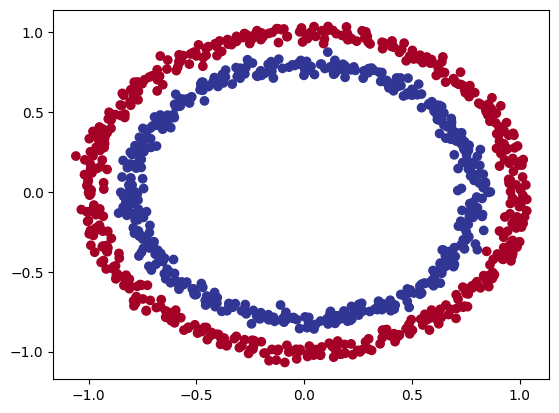

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.RdYlBu);

### Shapes of our data


In [ ]:
x.shape , y.shape

((1000, 2), (1000,))

In [ ]:
len(x) , len(y)

(1000, 1000)

In [ ]:
from sklearn.model_selection import train_test_split
xtr,xte,ytr,yte = train_test_split(x,y,test_size=0.2)

## Steps in modelling

Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. **Creating a model** - piece together the layers of a neural network yourself (using the [functional](https://www.tensorflow.org/guide/keras/functional) or [sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)) or import a previously built model (known as transfer learning).
2. **Compiling a model** - defining how a model's performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
3. **Fitting a model** - letting the model try to find patterns in the data (how does `X` get to `y`).

Let's see these in action using the Sequential API to build a model for our regression data. And then we'll step through each.|

In [ ]:
xtr.shape

(800, 2)

In [1]:
import tensorflow as tf

In [ ]:
tf.random.set_seed(42)
# Creating a model
clf1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)])

clf1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
            optimizer = tf.keras.optimizers.SGD(),
            metrics = ["accuracy"]
             )
clf1.fit(xtr,ytr, epochs =5)

Epoch 1/5
25/25 [==============================] - 1s 5ms/step - loss: 4.0652 - accuracy: 0.4575
Epoch 2/5
25/25 [==============================] - 0s 5ms/step - loss: 1.4856 - accuracy: 0.4975
Epoch 3/5
25/25 [==============================] - 0s 3ms/step - loss: 0.7274 - accuracy: 0.5063
Epoch 4/5
25/25 [==============================] - 0s 4ms/step - loss: 0.7062 - accuracy: 0.5000
Epoch 5/5
25/25 [==============================] - 0s 8ms/step - loss: 0.6991 - accuracy: 0.4938


Looking at the accuracy metric, our model performs poorly (50% accuracy on a binary classification problem is the equivalent of guessing), but what if we trained it for longer?

In [ ]:
clf1.fit(xtr,ytr, epochs =200)
clf1.evaluate(xte, yte)

Epoch 1/200
25/25 [==============================] - 0s 4ms/step - loss: 0.6963 - accuracy: 0.4875
Epoch 2/200
25/25 [==============================] - 0s 5ms/step - loss: 0.6954 - accuracy: 0.4850
Epoch 3/200
25/25 [==============================] - 0s 6ms/step - loss: 0.6947 - accuracy: 0.5150
Epoch 4/200
25/25 [==============================] - 0s 8ms/step - loss: 0.6940 - accuracy: 0.5013
Epoch 5/200
25/25 [==============================] - 0s 10ms/step - loss: 0.6941 - accuracy: 0.5138
Epoch 6/200
25/25 [==============================] - 0s 6ms/step - loss: 0.6939 - accuracy: 0.4975
Epoch 7/200
25/25 [==============================] - 0s 9ms/step - loss: 0.6943 - accuracy: 0.5025
Epoch 8/200
25/25 [==============================] - 0s 10ms/step - loss: 0.6939 - accuracy: 0.5250
Epoch 9/200
25/25 [==============================] - 0s 9ms/step - loss: 0.6944 - accuracy: 0.4975
Epoch 10/200
25/25 [==============================] - 0s 7ms/step - loss: 0.6942 - accuracy: 0.5138
Epoch 1

[0.6946526169776917, 0.4699999988079071]

Even after 200 passes of the data, it's still performing as if it's guessing.

What if we added an extra layer and trained for a little longer?

## Improving a model

To improve our model, we can alter almost every part of the 3 steps we went through before.

1. **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model** - you might want to choose a different optimization function (such as the [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) optimizer, which is usually pretty good for many problems) or perhaps change the learning rate of the optimization function.
3. **Fitting a model** - perhaps you could fit a model for more epochs (leave it training for longer).

![various options you can use to improve a neural network model](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-improving-a-model-from-model-perspective.png)
*There are many different ways to potentially improve a neural network. Some of the most common include: increasing the number of layers (making the network deeper), increasing the number of hidden units (making the network wider) and changing the learning rate. Because these values are all human-changeable, they're referred to as [hyperparameters](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)) and the practice of trying to find the best hyperparameters is referred to as [hyperparameter tuning](https://en.wikipedia.org/wiki/Hyperparameter_optimization).*

How about we try adding more neurons, an extra layer and our friend the Adam optimizer?

Surely doing this will result in predictions better than guessing...

> **Note:** The following message (below this one) can be ignored if you're running TensorFlow 2.8.0+, the error seems to have been fixed.

> **Note:** If you're using TensorFlow 2.7.0+ (but not 2.8.0+) the original code from the following cells may have caused some errors. They've since been updated to fix those errors. You can see explanations on what happened at the following resources:
* [Example Colab Notebook](https://colab.research.google.com/drive/1_dlrB_DJOBS9c9foYJs49I0YwN7LTakl?usp=sharing)
* [TensorFlow for Deep Learning GitHub Discussion on TensorFlow 2.7.0 breaking changes](https://github.com/mrdbourke/tensorflow-deep-learning/discussions/278)


In [ ]:
tf.random.set_seed(42)
# Creating a model
clf2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10 ),
    tf.keras.layers.Dense(1, activation ="softmax")])

clf2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
            optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
            metrics = ["accuracy"]
             )
clf2.fit(xtr,ytr, epochs =200, verbose =0)

In [ ]:
clf2.evaluate(xte, yte)

7/7 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.4700


[0.6945949792861938, 0.4699999988079071]

Whenever your model is performing strangely or there's something going on with your data you're not quite sure of, remember these three words: **visualize, visualize, visualize**. Inspect your data, inspect your model, inpsect your model's predictions.

To visulize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [ ]:
  # xmin, xmax =x[:,0].min() - 0.1, x[:,0].max() +0.1
  # ymin, ymax =x[:,1].min() - 0.1, x[:,1].max() +0.1
  # xmin, xmax , ymin, ymax

In [ ]:
  # xx, yy = np.meshgrid(np.linspace(xmin,xmax, 100),
  #                      np.linspace(ymin,ymax, 100))

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


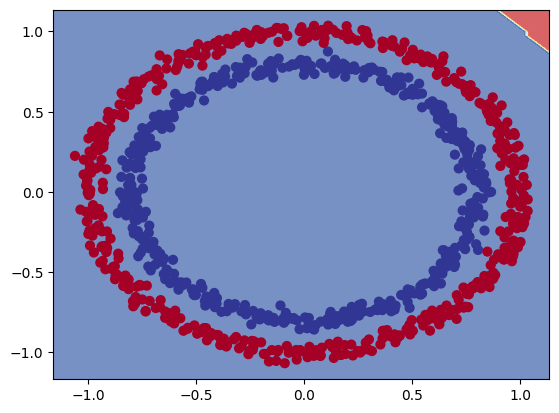

In [ ]:
# check out the prediction of our model
plot_decision_boundary(model=clf1, X=x, y =y)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]



In [ ]:
# # Fit our model to the data
# # Note: Before TensorFlow 2.7.0, this line would work
# # model_3.fit(X_reg_train, y_reg_train, epochs=100)

# # After TensorFlow 2.7.0, see here for more: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/278
# clf2.fit(tf.expand_dims(X_reg_train, axis=-1),
#             y_reg_train,
#             epochs=100)

In [ ]:
tf.random.set_seed(42)
# Creating a model
reg2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10 ),
    tf.keras.layers.Dense(1)])

reg2.compile(loss = tf.keras.losses.mae,
            optimizer = tf.keras.optimizers.Adam(),
            metrics = ["mae"]
             )
reg2.fit(tf.expand_dims(X_reg_train, axis=-1),y_reg_train, epochs =100, verbose =0)

2/2 [==============================] - 0s 6ms/step


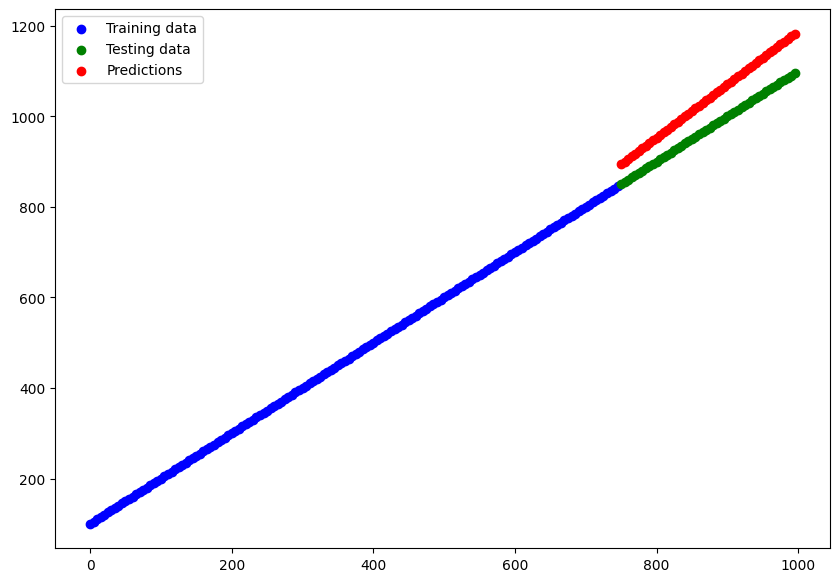

In [ ]:
# Make predictions with our trained model
y_reg_preds = reg2.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();

Okay, it seems like our model is learning something (the `mae` value trends down with each epoch), let's plot its predictions.

## The missing piece: Non-linearity

Okay, so we saw our neural network can model straight lines (with ability a little bit better than guessing).

What about non-straight (non-linear) lines?

If we're going to model our classification data (the red and blue circles), we're going to need some non-linear lines.

We're going to replicate the neural network you can see at this link: [TensorFlow Playground](https://playground.tensorflow.org/#activation=linear&batchSize=1&dataset=circle&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=0&networkShape=1&seed=0.09561&showTestData=false&discretize=false&percTrainData=70&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularizationRate_hide=true&discretize_hide=true&regularization_hide=true&dataset_hide=true&noise_hide=true&batchSize_hide=true).

![simple neural net created with TensorFlow playground](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-tensorflow-playground-simple-net-linear-activation.png)
*The neural network we're going to recreate with TensorFlow code. See it live at [TensorFlow Playground](https://playground.tensorflow.org/#activation=linear&batchSize=1&dataset=circle&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=0&networkShape=1&seed=0.09561&showTestData=false&discretize=false&percTrainData=70&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularizationRate_hide=true&discretize_hide=true&regularization_hide=true&dataset_hide=true&noise_hide=true&batchSize_hide=true).*

The main change we'll add to models we've built before is the use of the `activation` keyword.


In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear), # 1 hidden layer with linear activation
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # note: "lr" used to be what was used, now "learning_rate" is favoured
                metrics=["accuracy"])

# Fit the model
history = model_4.fit(x, y, epochs=100, verbose=0)

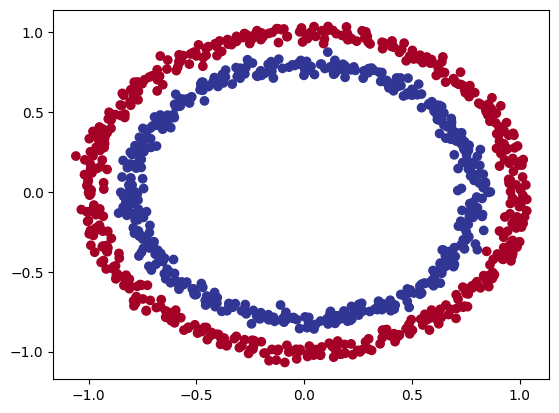

In [ ]:
# Check out our data
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [ ]:
# # Check the deicison boundary (blue is blue class, yellow is the crossover, red is red class)
# plot_decision_boundary(reg2,X=tf.expand_dims(x, axis=-1),y= y)

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


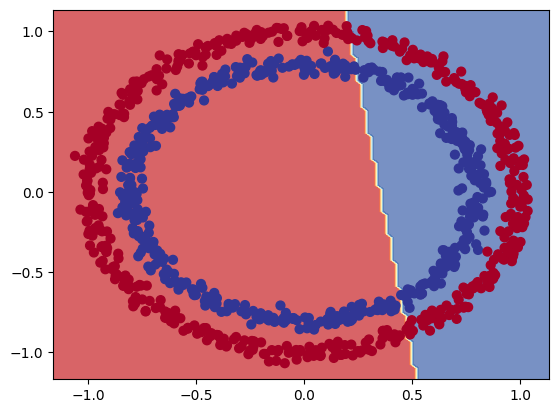

In [ ]:
# check out the prediction of our model
plot_decision_boundary(model=model_4, X=x, y =y)

Hmm... still not learning...

What we if increased the number of neurons and layers?

Say, 2 hidden layers, with [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu), pronounced "rel-u", (short for [rectified linear unit](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/)), activation on the first one, and 4 neurons each?

To see this network in action, check out the [TensorFlow Playground demo](https://playground.tensorflow.org/#activation=relu&regularization=L2&batchSize=30&dataset=circle&regDataset=reg-plane&learningRate=0.01&regularizationRate=0.003&noise=0&networkShape=8,4,2&seed=0.75919&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).

![multi-layer neural net created with TensorFlow playground](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-tensorflow-playground-two-layer-net-relu-activation.png)
*The neural network we're going to recreate with TensorFlow code. See it live at [TensorFlow Playground](https://playground.tensorflow.org/#activation=relu&regularization=L2&batchSize=30&dataset=circle&regDataset=reg-plane&learningRate=0.01&regularizationRate=0.003&noise=0&networkShape=8,4,2&seed=0.75919&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).*

Let's try.

**Note:** in the course, Daniel used `lr` instead of `learning_rate`. But for the update, we had changed to `learning_rate` instead of `lr`.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, 4 neurons, ReLU activation
  tf.keras.layers.Dense(1) # ouput layer
])

# Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model
history = model_6.fit(x, y, epochs=100, verbose=0)

In [ ]:
# Evaluate the model
model_6.evaluate(x, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.3687 - accuracy: 0.8390


[0.36870214343070984, 0.8389999866485596]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


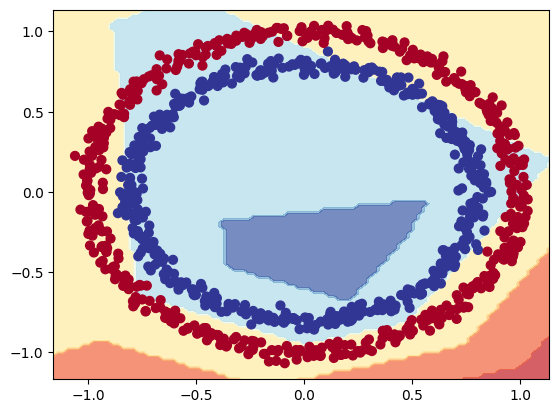

In [ ]:
# Check out the predictions using 2 hidden layers
plot_decision_boundary(model_6, X=x, y=y)

What gives?

It seems like our model is the same as the one in the [TensorFlow Playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,4&seed=0.93799&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&regularizationRate_hide=true&batchSize_hide=true) but model it's still drawing straight lines...

Ideally, the yellow lines go on the inside of the red circle and the blue circle.

Okay, okay, let's model this circle once and for all.

One more model (I promise... actually, I'm going to have to break that promise... we'll be building plenty more models).

This time we'll change the activation function on our output layer too. Remember the architecture of a classification model? For binary classification, the output layer activation is usually the [Sigmoid activation function](https://www.tensorflow.org/api_docs/python/tf/math/sigmoid).

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_7.fit(x, y, epochs=200, verbose=0)

In [ ]:
# Evaluate our model
model_7.evaluate(x, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0448 - accuracy: 0.9980


[0.04481181502342224, 0.9980000257492065]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


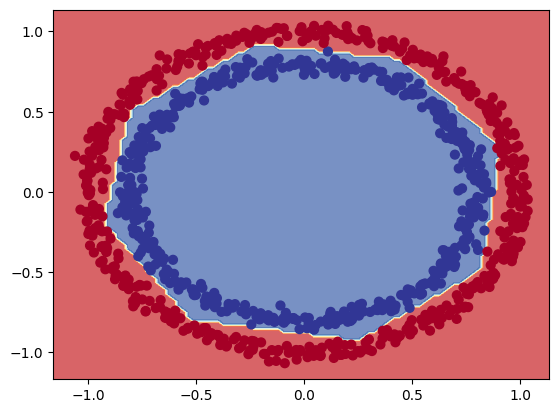

In [ ]:
# View the predictions of the model with relu and sigmoid activations
plot_decision_boundary(model_7, X=x,y= y)

Nice! It looks like our model is almost perfectly (apart from a few examples) separating the two circles.

> 🤔 **Question:** What's wrong with the predictions we've made? Are we really evaluating our model correctly here? Hint: what data did the model learn on and what did we predict on?

Before we answer that, it's important to recognize what we've just covered.

> 🔑 **Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

Think of it like this:

If I gave you an unlimited amount of straight lines and non-straight lines, what kind of patterns could you draw?

That's essentially what neural networks do to find patterns in data.

Now you might be thinking, "but I haven't seen a linear function or a non-linear function before..."

Oh but you have.

We've been using them the whole time.

They're what power the layers in the models we just built.

To get some intuition about the activation functions we've just used, let's create them and then try them on some toy data.

In [ ]:
# Let's create a toy tensor (similar to the data we pass into our model)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

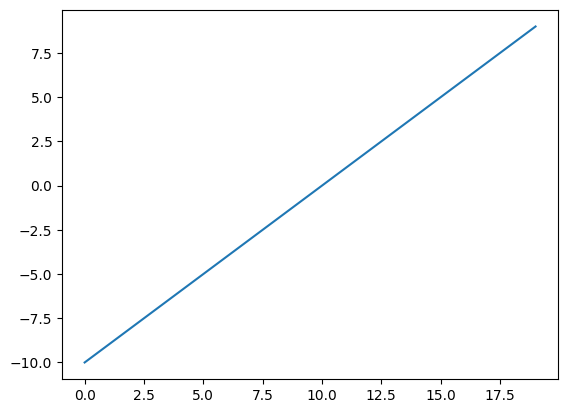

In [ ]:
# Visualize our toy tensor
plt.plot(A);

A straight (linear) line!

Nice, now let's recreate the [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function) and see what it does to our data. You can also find a pre-built sigmoid function at [`tf.keras.activations.sigmoid`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid).

In [ ]:
# Sigmoid - https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

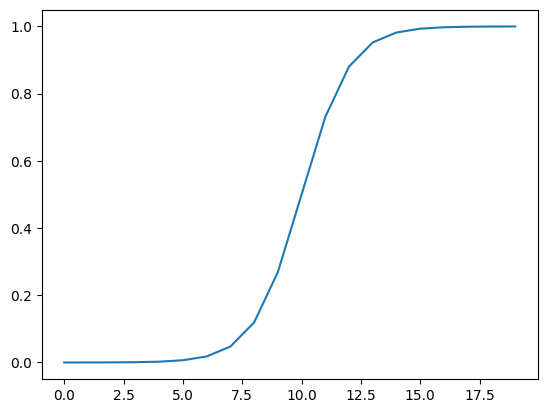

In [ ]:
# Plot sigmoid modified tensor
plt.plot(sigmoid(A));

A non-straight (non-linear) line!

Okay, how about the [ReLU function](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/#:~:text=The%20rectified%20linear%20activation%20function,otherwise%2C%20it%20will%20output%20zero.) (ReLU turns all negatives to 0 and positive numbers stay the same)?

In [ ]:
# ReLU - https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu
def relu(x):
  return tf.maximum(0, x)

# Pass toy tensor through ReLU function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

How does the ReLU-modified tensor look?

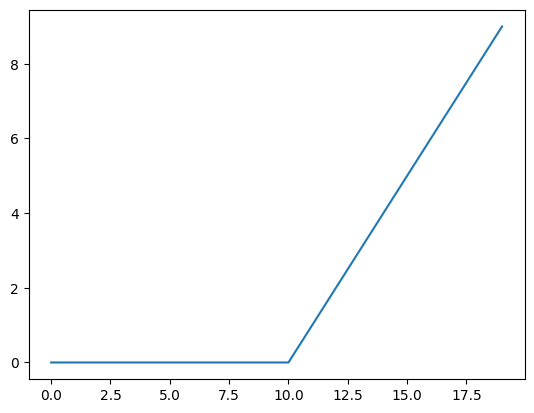

In [ ]:
# Plot ReLU-modified tensor
plt.plot(relu(A));

Another non-straight line!

Well, how about TensorFlow's [linear activation function](https://www.tensorflow.org/api_docs/python/tf/keras/activations/linear)?

In [ ]:
# Linear - https://www.tensorflow.org/api_docs/python/tf/keras/activations/linear (returns input non-modified...)
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

Hmm, it looks like our inputs are unmodified...

In [ ]:
# Does the linear activation change anything?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

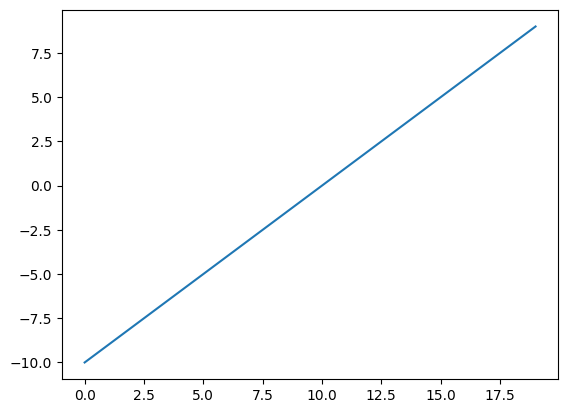

In [ ]:
# Does the linear activation function change anything?
plt.plot(tf.keras.activations.linear(A));

## Evaluating and improving our classificiation model

So far we've been training and testing on the same dataset...

However, in machine learning this is basically a sin.

So let's create a training and test set.

In [ ]:
# Let's recreate a model to fit on the training data and evaluate on the testing data

# Set random seed
tf.random.set_seed(42)
# 8th model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1,activation= "sigmoid")
])

model_8.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(0.01),
    metrics= ["accuracy"]
    )

mod_8 = model_8.fit(xtr, ytr, epochs=25, verbose=0)

In [ ]:
model_8.evaluate(xte,yte)

7/7 [==============================] - 0s 2ms/step - loss: 0.0297 - accuracy: 1.0000


[0.02970537729561329, 1.0]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


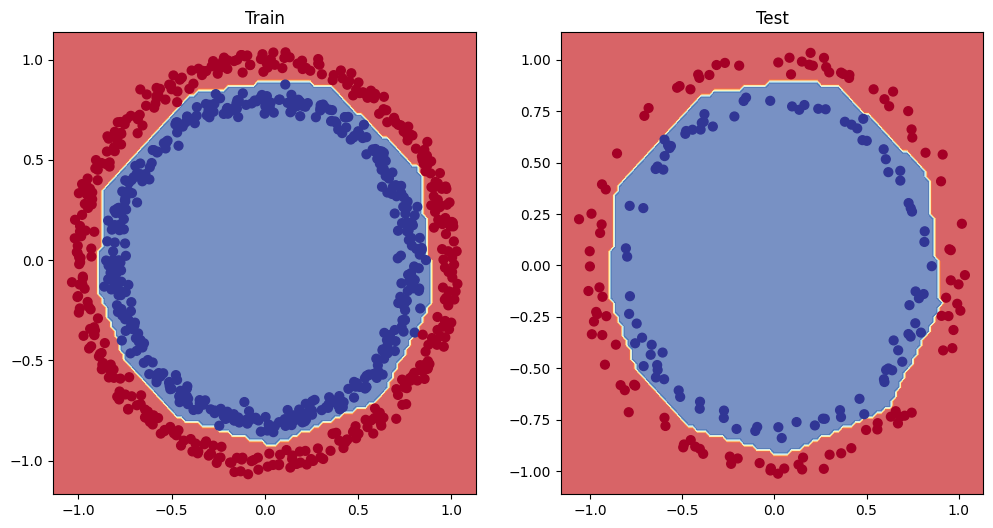

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8, X=xtr,y= ytr)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8, X=xte,y= yte)

## Plot the loss (or training) curves

In [ ]:
pd.DataFrame(mod_8.history)

,loss,accuracy
0,0.692878,0.50750
1,0.685213,0.51250
2,0.677682,0.61500
3,0.667555,0.60125
4,0.654457,0.67875
5,0.636773,0.71000
6,0.603177,0.78125
7,0.514521,0.89875
8,0.430600,0.89125
9,0.326468,0.97750


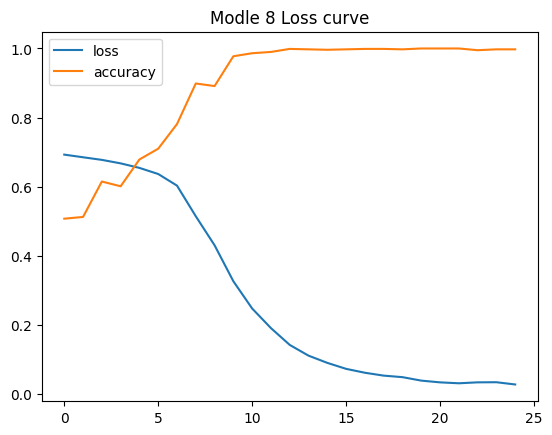

In [ ]:
pd.DataFrame(mod_8.history).plot()
plt.title("Modle 8 Loss curve");

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of funtionality, you can add to your *while* its training.
* Another model (we could use the same one as above, but we're practicing building models here)
* A modified loss curves plot.



In [ ]:
# Let's recreate a model to fit on the training data and evaluate on the testing data

# Set random seed
tf.random.set_seed(42)
# 8th model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1,activation= "sigmoid")
])

model_9.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics= ["accuracy"]
    )
# Creting a learning rate callback--
# 1e = 10 & 1e-4= 10^-4 which is 0.0001
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))


mod_9 = model_9.fit(xtr, ytr, epochs=100,callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7027 - accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7023 - accuracy: 0.4963 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7020 - accuracy: 0.4988 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7016 - accuracy: 0.4963 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7012 - accuracy: 0.4963 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7007 - accuracy: 0.4925 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7003 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6998 - accuracy: 0.4925 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

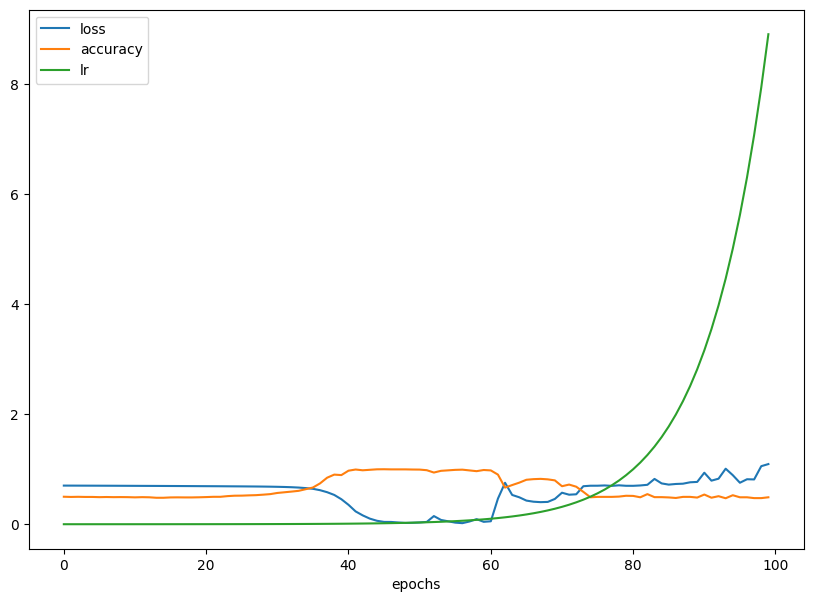

In [ ]:
# plot the result
pd.DataFrame(mod_9.history).plot(figsize=(10,7), xlabel="epochs");

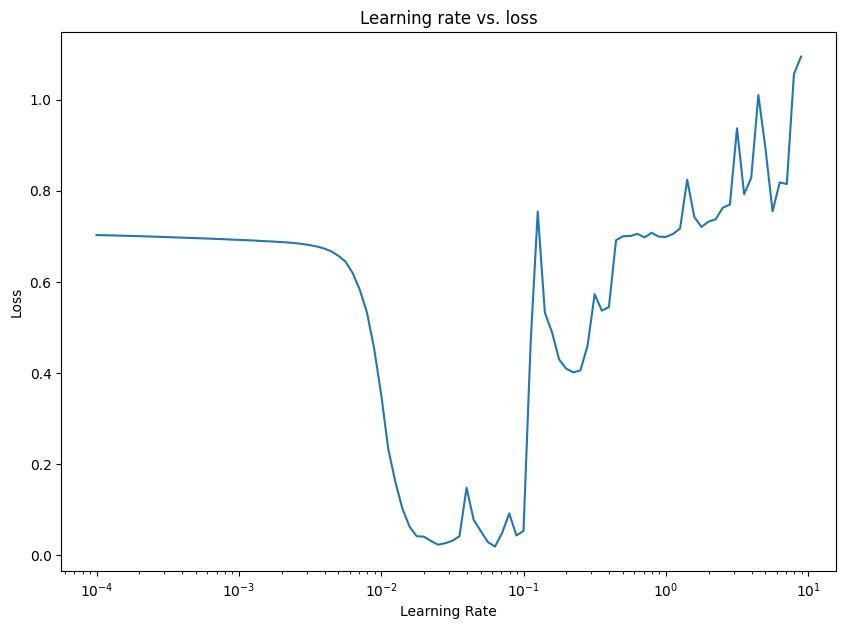

In [ ]:
# plot the learning rate vs the loss
lrs = 1e-4 * (10 **(tf.range(100)/20))
#lrs
#len(lrs)
plt.figure(figsize=(10,7))
plt.semilogx(lrs, mod_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [ ]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4, 1e-5

(1, 0.1, 0.01, 0.001, 0.0001, 1e-05)

In [ ]:
# 8th model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1,activation= "sigmoid")
])

model_10.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(0.02),
    metrics= ["accuracy"]
    )

mod_10 = model_10.fit(xtr, ytr, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6934 - accuracy: 0.5487
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6812 - accuracy: 0.5562
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6556 - accuracy: 0.6513
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6065 - accuracy: 0.7138
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5350 - accuracy: 0.7487
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.4499 - accuracy: 0.8350
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.3331 - accuracy: 0.9362
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.2364 - accuracy: 0.9787
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.1755 - accuracy: 0.9825
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.1323 - accuracy: 0.9812
Epoch 11/25
25/25 [

In [ ]:
# Evaluate model 10 on the test dataset
model_10.evaluate(xte,yte)

7/7 [==============================] - 0s 2ms/step - loss: 0.0206 - accuracy: 1.0000


[0.020599685609340668, 1.0]

In [ ]:
# Evaluate model 8 on the test dataset
model_8.evaluate(xte,yte)

7/7 [==============================] - 0s 2ms/step - loss: 0.0297 - accuracy: 1.0000


[0.02970537729561329, 1.0]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


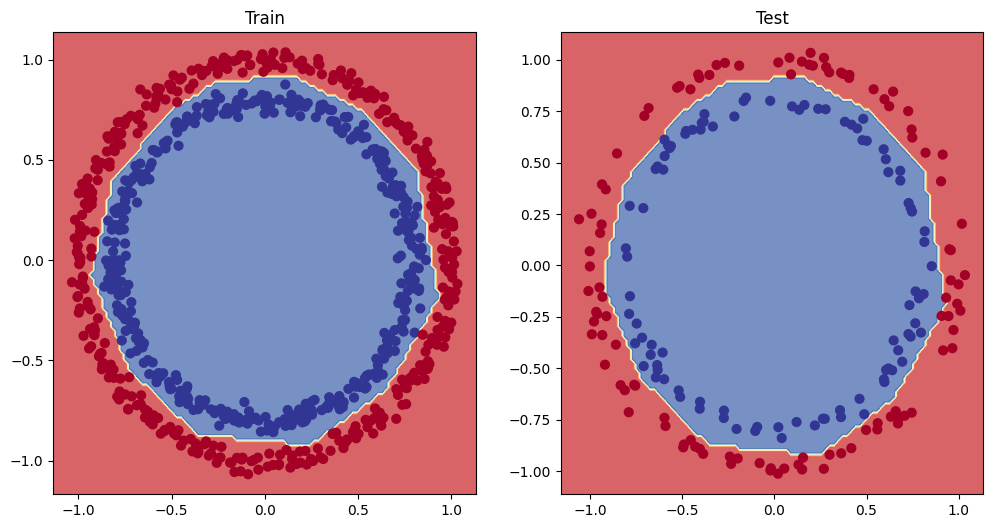

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model=model_10, X=xtr, y=ytr)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model=model_10, X=xte, y=yte)

### More classification evaluation methods

Alongside the visualizations we've been making, there are a number of different evaluation metrics we can use to evaluate our classification models.

| **Metric name/Evaluation method** | **Defintion** | **Code** |
| --- | --- | --- |
| Accuracy | Out of 100 predictions, how many does your model get correct? E.g. 95% accuracy means it gets 95/100 predictions correct. | [`sklearn.metrics.accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) or [`tf.keras.metrics.Accuracy()`](tensorflow.org/api_docs/python/tf/keras/metrics/Accuracy) |
| Precision | Proportion of true positives over total number of samples. Higher precision leads to less false positives (model predicts 1 when it should've been 0). | [`sklearn.metrics.precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) or [`tf.keras.metrics.Precision()`](tensorflow.org/api_docs/python/tf/keras/metrics/Precision) |
| Recall | Proportion of true positives over total number of true positives and false negatives (model predicts 0 when it should've been 1). Higher recall leads to less false negatives. | [`sklearn.metrics.recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) or [`tf.keras.metrics.Recall()`](tensorflow.org/api_docs/python/tf/keras/metrics/Recall) |
| F1-score | Combines precision and recall into one metric. 1 is best, 0 is worst. | [`sklearn.metrics.f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) |
| [Confusion matrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)  | Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line). | Custom function or [`sklearn.metrics.plot_confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html) |
| Classification report | Collection of some of the main classification metrics such as precision, recall and f1-score. | [`sklearn.metrics.classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) |

> 🔑 **Note:** Every classification problem will require different kinds of evaluation methods. But you should be familiar with at least the ones above.

Let's start with accuracy.

Because we passed `["accuracy"]` to the `metrics` parameter when we compiled our model, calling `evaluate()` on it will return the loss as well as accuracy.

In [ ]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(xte, yte)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100)}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.0148 - accuracy: 1.0000
Model loss on test set: 0.014790212735533714
Model accuracy on test set: 100.0%


How about a confusion matrix?

![anatomy of a confusion matrix](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-anatomy-of-a-confusion-matrix.png)
*Anatomy of a confusion matrix (what we're going to be creating). Correct predictions appear down the diagonal (from top left to bottom right).*

We can make a confusion matrix using [Scikit-Learn's `confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) method.

In [ ]:
# # Create a confusion matrix
# from sklearn.metrics import confusion_matrix

# # Make predictions
# y_preds = model_10.predict(xte)

# # Create confusion matrix
# confusion_matrix(yte, y_preds)

7/7 [==============================] - 0s 5ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

Ahh, it seems our predictions aren't in the format they need to be.

Let's check them out.

In [ ]:
yte

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1])

In [ ]:
y_preds[:10]

array([[1.27872650e-03],
       [3.36058787e-03],
       [3.04126996e-03],
       [9.99831021e-01],
       [9.98866856e-01],
       [1.31357426e-03],
       [2.30743899e-03],
       [6.04605360e-04],
       [1.71411678e-03],
       [1.04480736e-01]], dtype=float32)

It looks like we need to get our predictions into the binary format (0 or 1).

But you might be wondering, what format are they currently in?

In their current format (`9.8526537e-01`), they're in a form called **prediction probabilities**.

You'll see this often with the outputs of neural networks. Often they won't be exact values but more a probability of how *likely* they are to be one value or another.

So one of the steps you'll often see after making predicitons with a neural network is converting the prediction probabilities into labels.

In our case, since our ground truth labels (`y_test`) are binary (0 or 1), we can convert the prediction probabilities using to their binary form using [`tf.round()`](https://www.tensorflow.org/api_docs/python/tf/math/round).

In [ ]:
# Convert prediction probabilities to binary format and view the first 10
tf.cast(tf.round(y_preds)[:10], dtype="int32")

<tf.Tensor: shape=(10, 1), dtype=int32, numpy=
array([[0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=int32)>

Wonderful! Now we can use the `confusion_matrix` function.

In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(yte, tf.round(y_preds))

array([[106,   0],
       [  0,  94]])

Alright, we can see the highest numbers are down the diagonal (from top left to bottom right) so this a good sign, but the rest of the matrix doesn't really tell us much.

How about we make a function to make our confusion matrix a little more visual?

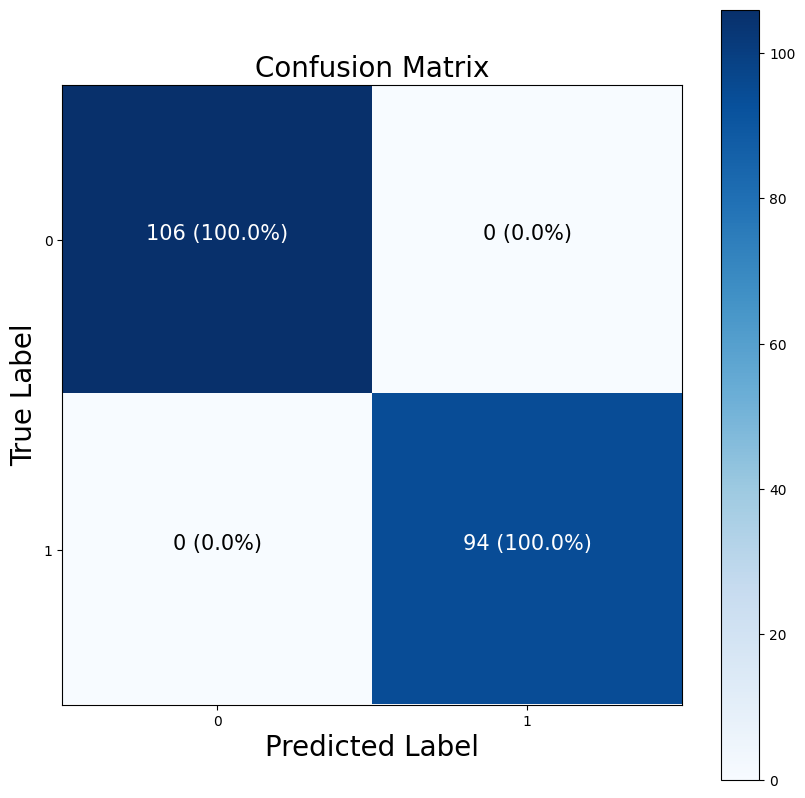

In [ ]:
# Note: the confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html?highlight=plot%20confusion%20matrix#sklearn.metrics.plot_confusion_matrix

import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(yte, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

## Working with a larger example (multiclass classification)

We've seen a binary classification example (predicting if a data point is part of a red circle or blue circle) but what if you had multiple different classes of things?

For example, say you were a fashion company and you wanted to build a neural network to predict whether a piece of clothing was a shoe, a shirt or a jacket (3 different options).

When you have more than two classes as an option, this is known as **multiclass classification**.

The good news is, the things we've learned so far (with a few tweaks) can be applied to multiclass classification problems as well.

Let's see it in action.

To start, we'll need some data. The good thing for us is TensorFlow has a multiclass classication dataset known as [Fashion MNIST built-in](https://github.com/zalandoresearch/fashion-mnist). Meaning we can get started straight away.

We can import it using the [`tf.keras.datasets`](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) module.

> 📖 **Resource:** The following multiclass classification problem has been adapted from the [TensorFlow classification guide](https://www.tensorflow.org/tutorials/keras/classification). A good exercise would be to once you've gone through the following example, replicate the TensorFlow guide.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has alrea
(xtr, ytr) , (xte, yte) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Now let's check out an example.

In [2]:
# Show the first training example
print(f"Training sample:\n{xtr[0]}\n")
print(f"Training label: {ytr[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [3]:
#check the shape of a single data
xtr[0].shape, ytr[0].shape

((28, 28), ())

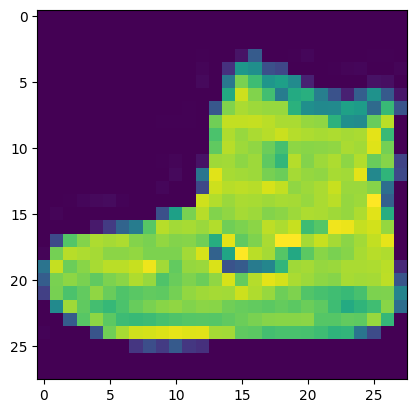

In [4]:
#plot a single sample
import matplotlib.pyplot as plt
plt.imshow(xtr[0]);

In [5]:
ytr[0]

9

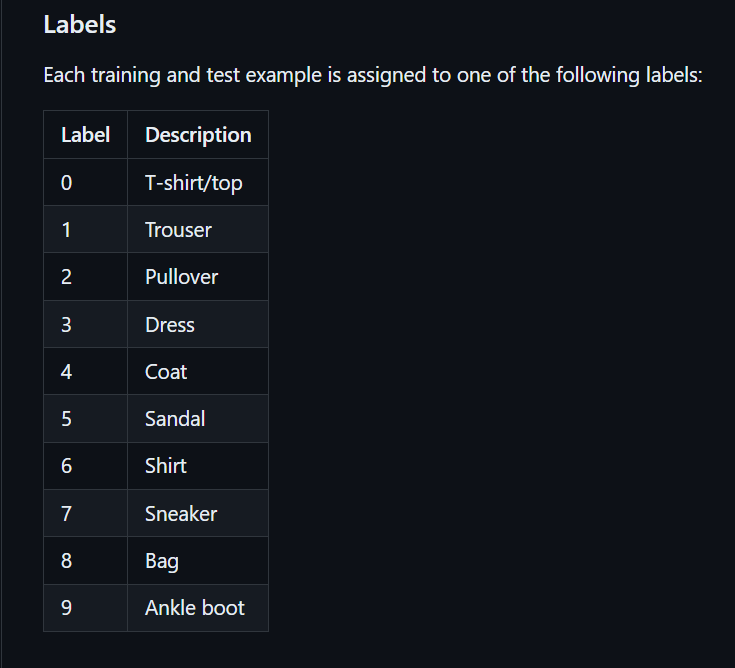

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

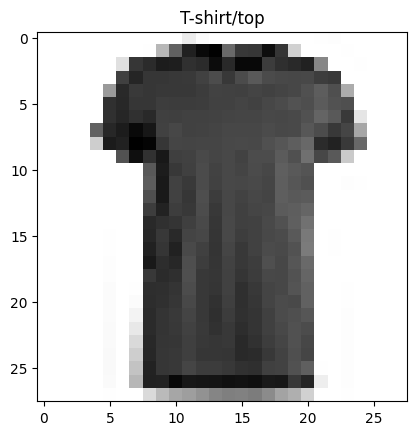

In [7]:
#plot an example image and it's label
# i = index
i=17
plt.imshow(xtr[i], cmap=plt.cm.binary)
plt.title(class_names[ytr[i]])

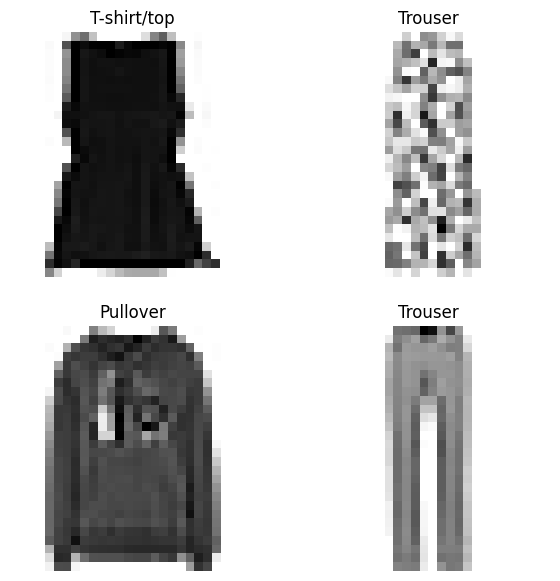

In [8]:
#plot multiple random images
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  random_index = random.choice(range(len(xtr)))
  plt.imshow(xtr[random_index],cmap=plt.cm.binary)
  plt.title(class_names[ytr[random_index]])
  plt.axis(False)

## Building a multi-class classification model

For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things:
* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrosstentropy()
  * If your labels are one-hot encoded, use CategoricalCrossentropy()
  * If your labels are integer form use SparseCategoricalCrossentropy()
* Output layer activation = Softmax (not sigmoid)

In [9]:
xtr.shape , len(class_names)

((60000, 28, 28), 10)

Alright, let's build a model to figure out the relationship between the pixel values and their labels.

Since this is a multiclass classification problem, we'll need to make a few changes to our architecture (inline with Table 1 above):

* The **input shape** will have to deal with 28x28 tensors (the height and width of our images).
  * We're actually going to squash the input into a tensor (vector) of shape `(784)`.
* The **output shape** will have to be 10 because we need our model to predict for 10 different classes.
  * We'll also change the `activation` parameter of our output layer to be [`"softmax"`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) instead of `'sigmoid'`. As we'll see the `"softmax"` activation function outputs a series of values between 0 & 1 (the same shape as **output shape**, which together add up to ~1. The index with the highest value is predicted by the model to be the most *likely* class.
* We'll need to change our loss function from a binary loss function to a multiclass loss function.
  * More specifically, since our labels are in integer form, we'll use [`tf.keras.losses.SparseCategoricalCrossentropy()`](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy), if our labels were one-hot encoded (e.g. they looked something like `[0, 0, 1, 0, 0...]`), we'd use [`tf.keras.losses.CategoricalCrossentropy()`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy).
* We'll also use the `validation_data` parameter when calling the `fit()` function. This will give us an idea of how the model performs on the test set during training.

You ready? Let's go.

In [10]:
# our data needs to be flattened (from 28*28 to None, 784)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output_shape

(None, 784)

In [11]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation= tf.keras.activations.softmax),
])

model_11.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

#lr_scheduler = tf.keras.callbacks(lr_scheduler)

mod_11 = model_11.fit(xtr, ytr, epochs=10, validation_data=(xte,yte))


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.5076 - accuracy: 0.0983 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0988 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

We can also change it to one hot encoding and use `CategoricalCrossEntropy`

In [12]:
tf.one_hot(ytr,depth=10)

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [13]:
# tf.random.set_seed(42)

# model_11 = tf.keras.Sequential([
#     tf.keras.layers.Flatten(input_shape=(28,28)),
#     tf.keras.layers.Dense(4, activation="relu"),
#     tf.keras.layers.Dense(4, activation="relu"),
#     tf.keras.layers.Dense(10, activation= tf.keras.activations.softmax),
# ])

# model_11.compile(
#     loss= tf.keras.losses.CategoricalCrossentropy(),
#     optimizer = tf.keras.optimizers.Adam(),
#     metrics = ["accuracy"]
# )

# mod_11 = model_11.fit(xtr, tf.one_hot(ytr,depth=10), epochs=10, validation_data=(xte,tf.one_hot(yte, depth =10)))



In [14]:
model_11.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Normalizing our data

Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns between 0 & 1.

In [15]:
xtr.min(), xtr.max()

(0, 255)

In [16]:
nxtr = xtr / 255.0
nxte = xte/255.0

In [17]:
nxtr.min(), nxtr.max()

(0.0, 1.0)

In [18]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation= tf.keras.activations.softmax),
])

model_12.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

#lr_scheduler = tf.keras.callbacks(lr_scheduler)

mod_12 = model_12.fit(nxtr, ytr, epochs=10, validation_data=(nxte,yte))


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3627 - accuracy: 0.5167 - val_loss: 0.9236 - val_accuracy: 0.7038
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8032 - accuracy: 0.7514 - val_loss: 0.7607 - val_accuracy: 0.7643
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6896 - accuracy: 0.7755 - val_loss: 0.6825 - val_accuracy: 0.7787
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6368 - accuracy: 0.7893 - val_loss: 0.6438 - val_accuracy: 0.7885
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6068 - accuracy: 0.7977 - val_loss: 0.6365 - val_accuracy: 0.7903
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5866 - accuracy: 0.8023 - val_loss: 0.6220 - val_accuracy: 0.7889
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5751 - accuracy: 0.8051 - val_loss: 0.6023 - val_accuracy:

Woah, we used the exact same model as before but we with normalized data we're now seeing a much higher accuracy value!

Let's plot each model's history (their loss curves).

<Axes: title={'center': 'Normalized data'}>

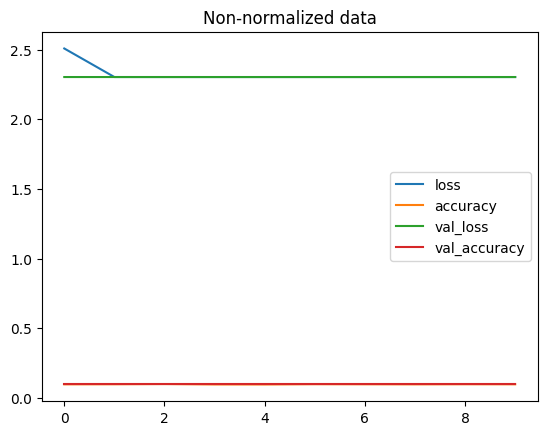

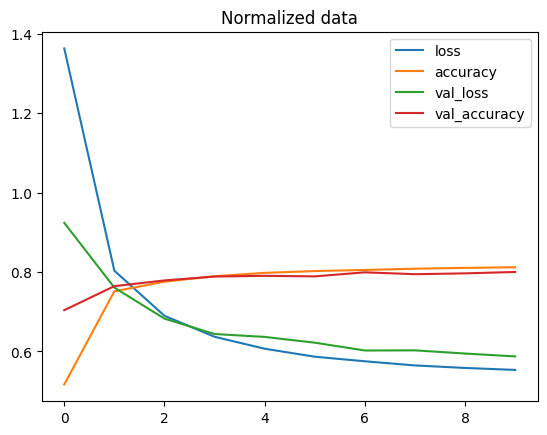

In [19]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(mod_11.history).plot(title="Non-normalized data")
# Plot normalized data loss curves
pd.DataFrame(mod_12.history).plot(title="Normalized data")

Wow. From these two plots, we can see how much quicker our model with the normalized data (`model_12`) improved than the model with the non-normalized data (`model_11`).

**Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture).

How about we find the ideal learning rate and see what happens?

We'll use the same architecture we've been using.

## Finding the ideal learning rate

In [20]:
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation= tf.keras.activations.softmax),
])

model_13.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

mod_13 = model_13.fit(nxtr, ytr, epochs=40,callbacks=[lr_scheduler] ,validation_data=(nxte,yte))


Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4788 - accuracy: 0.4213 - val_loss: 1.2027 - val_accuracy: 0.4874 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0436 - accuracy: 0.6107 - val_loss: 0.9167 - val_accuracy: 0.6903 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8086 - accuracy: 0.7130 - val_loss: 0.8027 - val_accuracy: 0.7005 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7348 - accuracy: 0.7282 - val_loss: 0.7327 - val_accuracy: 0.7286 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7034 - accuracy: 0.7383 - val_loss: 0.7117 - val_accuracy: 0.7396 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6808 - accuracy: 0.7471 - val_loss: 0.7330 - val_accuracy: 0.7379 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Finding the ideal learning rate')

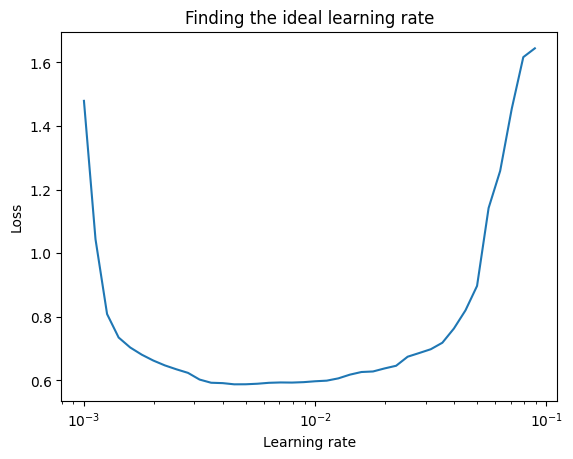

In [21]:
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs,mod_13.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [22]:
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation= tf.keras.activations.softmax),
])

model_13.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ["accuracy"]
)

# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

mod_13 = model_13.fit(nxtr, ytr, epochs=20,callbacks=[lr_scheduler] ,validation_data=(nxte,yte))


Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.8365 - accuracy: 0.2217 - val_loss: 1.6625 - val_accuracy: 0.2700 - lr: 0.0010
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1581 - accuracy: 0.5351 - val_loss: 0.9597 - val_accuracy: 0.6215 - lr: 0.0011
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8823 - accuracy: 0.6582 - val_loss: 0.8786 - val_accuracy: 0.6622 - lr: 0.0013
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8312 - accuracy: 0.6783 - val_loss: 0.8427 - val_accuracy: 0.6807 - lr: 0.0014
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8059 - accuracy: 0.6885 - val_loss: 0.8272 - val_accuracy: 0.6938 - lr: 0.0016
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7882 - accuracy: 0.6985 - val_loss: 0.8149 - val_accuracy: 0.6941 - lr: 0.0018
Epoch 7/20
1875/1875 [==============================] - 4s

## Evaluating our multi-class classification model

To evlauate our multi-class classification model we could:
* Evalaute its performance using other classification metrics (such as a confusion matrix)
* Assess some of its predictions (through visualizations)
* Improve its results (by training it for longer or changing the architecutre)
* Save and export it for use in an application

Let's go through the top 2...


In [23]:
# Create a confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [27]:
# Make some predictions with our model
y_probs = model_13.predict(nxte) # probs is short for "prediction probabilities"
y_probs[:5]

313/313 [==============================] - 2s 5ms/step


array([[3.5955315e-03, 1.4828979e-05, 1.7880903e-07, 2.7423162e-06,
        1.1497855e-08, 5.0210629e-02, 2.2377086e-05, 7.4699640e-01,
        3.7289577e-05, 1.9912010e-01],
       [5.0216511e-02, 1.3031831e-05, 3.4112906e-01, 1.2759814e-02,
        1.2722744e-01, 1.6590859e-05, 4.6330211e-01, 4.2604371e-12,
        5.3353463e-03, 1.8964309e-11],
       [1.5223190e-03, 9.9572402e-01, 3.2809175e-10, 2.7536287e-03,
        4.4017248e-09, 1.3303085e-22, 6.9428751e-08, 6.9723830e-32,
        1.8587460e-08, 8.3075985e-12],
       [6.0414233e-05, 9.9842477e-01, 6.1204319e-12, 1.5148305e-03,
        4.3328283e-10, 3.4137676e-30, 1.1104603e-09, 0.0000000e+00,
        1.1134013e-10, 6.3867588e-17],
       [6.4621651e-01, 4.8597818e-04, 2.7260348e-02, 1.2264116e-02,
        4.5622350e-03, 2.3956323e-02, 2.6323643e-01, 1.7563229e-05,
        2.1984154e-02, 1.6285429e-05]], dtype=float32)

In [25]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

 **Note:** Remember to make predictions on the same kind of data your model was trained on (e.g. if your model was trained on normalized data, you'll want to make predictions on normalized data).

In [30]:
y_probs[0], tf.argmax(y_probs[0])

(array([3.5955315e-03, 1.4828979e-05, 1.7880903e-07, 2.7423162e-06,
        1.1497855e-08, 5.0210629e-02, 2.2377086e-05, 7.4699640e-01,
        3.7289577e-05, 1.9912010e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=7>)

In [31]:
class_names[tf.argmax(y_probs[0])]

'Sneaker'

In [32]:
#Convert all prediction probs into integer
y_preds= y_probs.argmax(axis=1)
y_preds[:10]

array([7, 6, 1, 1, 0, 1, 2, 6, 5, 7])

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=yte,
                 y_pred=y_preds)

array([[789,   1,   3,  48,   6,  20,  85,   5,  40,   3],
       [ 38, 900,   0,  47,   5,   1,   7,   0,   2,   0],
       [ 36,   1, 203,   7, 201,   2, 525,   0,  25,   0],
       [175,  12,   9, 669,  49,   0,  82,   0,   3,   1],
       [ 11,   0, 190,  32, 560,   0, 200,   0,   7,   0],
       [  8,   0,   0,   0,   0, 796,   0, 149,  18,  29],
       [211,   0,  97,  33,  64,   6, 533,   1,  55,   0],
       [  0,   0,   0,   0,   0,  80,   0, 807,   1, 112],
       [ 16,   0,   0,   2,   4,  33,  32,   3, 908,   2],
       [  1,   0,   0,   0,   0,   1,   0,  94,   1, 903]])

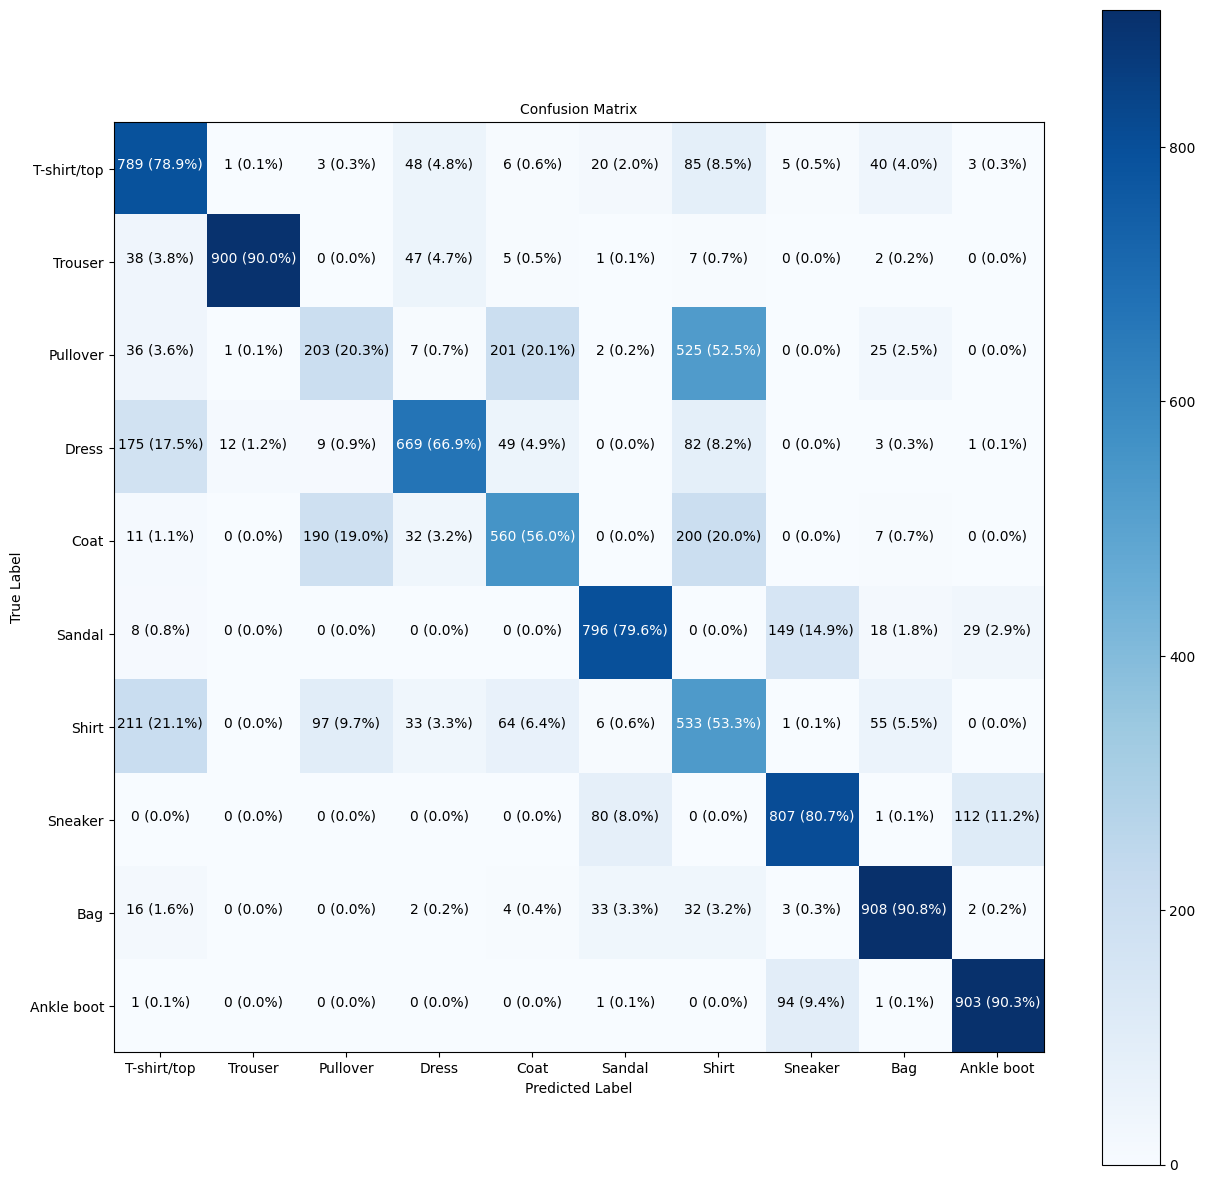

In [38]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=yte,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

That looks much better! (one of my favourites sights in the world is a confusion matrix with dark squares down the diagonal)

Except the results aren't as good as they could be...

It looks like our model is getting confused between the `Shirt` and `T-shirt/top` classes (e.g. predicting `Shirt` when it's actually a `T-shirt/top`).

> 🤔 **Question:** Does it make sense that our model is getting confused between the `Shirt` and `T-shirt/top` classes? Why do you think this might be? What's one way you could investigate?

We've seen how our models predictions line up to the truth labels using a confusion matrix, but how about we visualize some?

Let's create a function to plot a random image along with its prediction.

> 🔑 **Note:** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the outputs of your model.

How about we create a fun little function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label & the predicted label

In [40]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """
  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red based on if prediction is right or wrong

1/1 [==============================] - 0s 42ms/step


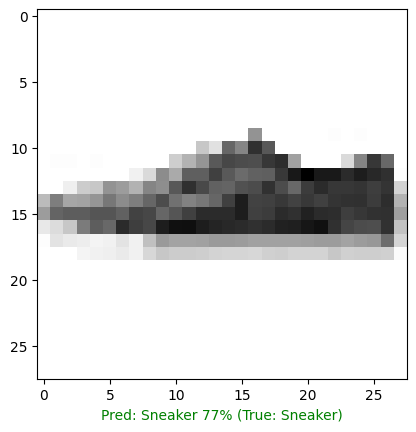

In [51]:
plot_random_image(model=model_13, images= nxte, true_labels=yte, classes=class_names)

After running the cell above a few times you'll start to get a visual understanding of the relationship between the model's predictions and the true labels.

Did you figure out which predictions the model gets confused on?

It seems to mix up classes which are similar, for example, `Sneaker` with `Ankle boot`.

Looking at the images, you can see how this might be the case.

The overall shape of a `Sneaker` and an `Ankle Boot` are similar.

The overall shape might be one of the patterns the model has learned and so therefore when two images have a similar shape, their predictions get mixed up.

## What patterns is our model learning?
We've been talking a lot about how a neural network finds patterns in numbers, but what exactly do these patterns look like?

Let's crack open one of our models and find out.

First, we'll get a list of layers in our most recent model (`model_14`) using the `layers` attribute.

In [52]:
# Find the layers of our most recent model
model_13.layers

In [53]:
# Extract a particular layer
model_13.layers[1]

In [55]:
# Get the patterns of a layer in our network
weights, biases = model_13.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 5.0142318e-02, -2.6689842e-03,  1.9455693e+00,  2.1968727e+00],
        [-4.3978199e-02, -7.7754401e-02, -1.0498739e-01,  4.3357825e+00],
        [-4.4646598e-02, -3.2649335e-02,  1.1803449e+00,  3.7599692e+00],
        ...,
        [ 8.7879598e-04,  6.1152682e-02,  3.5031167e-01,  6.4103013e-01],
        [ 1.1139773e-02,  3.3635542e-02,  9.4640501e-02,  3.9968473e-01],
        [-7.2241366e-02,  1.1231855e-02,  2.4797101e+00,  2.9781908e-03]],
       dtype=float32),
 (784, 4))

The weights matrix is the same shape as the input data, which in our case is 784 (28x28 pixels). And there's a copy of the weights matrix for each neuron the in the selected layer (our selected layer has 4 neurons).

Each value in the weights matrix corresponds to how a particular value in the input data influences the network's decisions.

These values start out as random numbers (they're set by the [`kernel_initializer` parameter](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) when creating a layer, the default is [`"glorot_uniform"`](https://www.tensorflow.org/api_docs/python/tf/keras/initializers/GlorotUniform)) and are then updated to better representative values of the data (non-random) by the neural network during training.

![neural network supervised learning weight updates](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-fashion-mnist-learning.png)
*Example workflow of how a supervised neural network starts with random weights and updates them to better represent the data by looking at examples of ideal outputs.*

Now let's check out the bias vector.

In [56]:
# Shape = 1 bias per neuron (we use 4 neurons in the first layer)
biases, biases.shape

(array([-0.01296291, -0.01360146,  6.6194444 ,  6.1871233 ], dtype=float32),
 (4,))

Every neuron has a bias vector. Each of these is paired with a weight matrix.

The bias values get initialized as zeroes by default (using the [`bias_initializer` parameter](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [58]:
model_13.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 4)                 3140      
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Now we've built a few deep learning models, it's a good time to point out the whole concept of inputs and outputs not only relates to a model as a whole but to *every* layer within a model.

You might've already guessed this, but starting from the input layer, each subsequent layer's input is the output of the previous layer.

We can see this clearly using the utility [`plot_model()`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model).

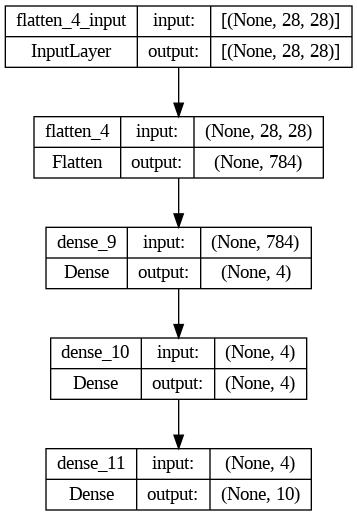

In [59]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_13, show_shapes=True)



---

                              End